<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Step 1: Import Required Libraries


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Step 2: Define the Autoencoder Model

In [2]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # Latent space dimension
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()  # To ensure the output is in the range [0, 1]
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Step 3: Prepare the Data

In [3]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor()])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=256, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.7MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.34MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.57MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Step 4: Initialize the Model, Loss Function, and Optimizer

In [4]:
# Initialize the model
model = Autoencoder()

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the Model

In [5]:
# Training loop
num_epochs = 10
outputs = []

for epoch in range(num_epochs):
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the image
        recon = model(img)
        loss = criterion(recon, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epoch, img, recon))

Epoch:1, Loss:0.0597
Epoch:2, Loss:0.0546
Epoch:3, Loss:0.0559
Epoch:4, Loss:0.0500
Epoch:5, Loss:0.0453
Epoch:6, Loss:0.0393
Epoch:7, Loss:0.0399
Epoch:8, Loss:0.0394
Epoch:9, Loss:0.0390
Epoch:10, Loss:0.0367


# Step 6: Visualize the Results

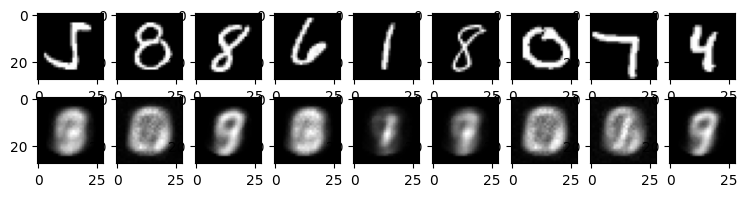

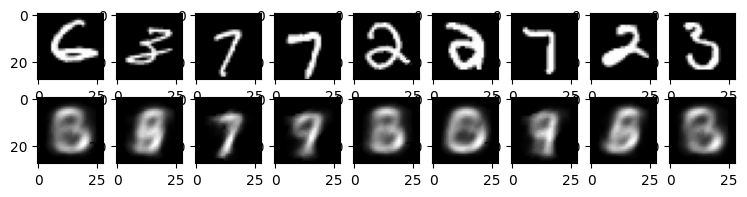

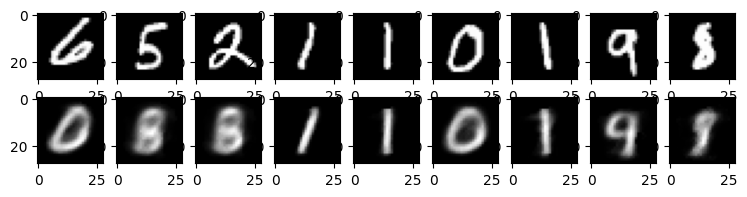

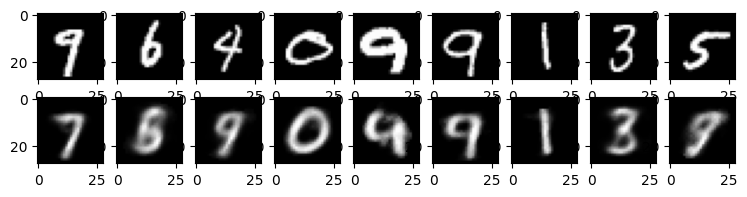

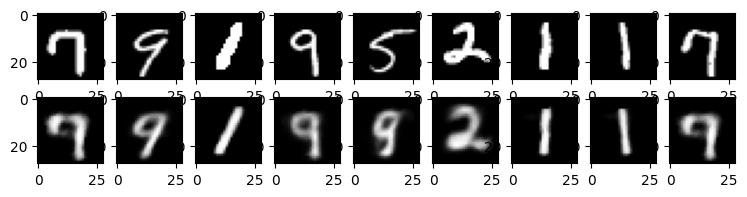

In [7]:
# Function to plot images
def plot_images(epoch, original, reconstructed):
    plt.figure(figsize=(9, 2))
    for i, item in enumerate(original):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28, 28)  # Reshape to 28x28
        plt.imshow(item[0], cmap='gray')

    for i, item in enumerate(reconstructed):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1)
        item = item.reshape(-1, 28, 28)  # Reshape to 28x28
        plt.imshow(item[0].detach().numpy(), cmap='gray')

# Plot the results
for k in range(0, num_epochs, 2):
    epoch, img, recon = outputs[k]
    plot_images(epoch, img, recon)
    plt.show()

# Summary

This code defines a simple autoencoder model using PyTorch. The model is trained on the MNIST dataset, which consists of 28x28 grayscale images of handwritten digits. The autoencoder learns to compress the images into a 3-dimensional latent space and then reconstructs them. The training process is visualized by plotting the original and reconstructed images at different epochs.